In [31]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

In [32]:
dataset=pd.read_csv('SP500_new.csv',usecols=[5], engine='python', skipfooter=1)

In [33]:
dataset

,Adj Close
0,885.140015
1,891.030029
2,904.030029
3,916.919983
4,912.200012
5,918.750000
6,907.539978
7,913.780029
8,916.679993
9,918.380005


In [34]:
dataset=dataset.pct_change(1)

In [35]:
dataset

,Adj Close
0,NaN
1,0.006654
2,0.014590
3,0.014258
4,-0.005148
5,0.007180
6,-0.012201
7,0.006876
8,0.003174
9,0.001855


In [36]:
dataset=dataset*100

In [37]:
dataset

,Adj Close
0,NaN
1,0.665433
2,1.458986
3,1.425833
4,-0.514764
5,0.718043
6,-1.220138
7,0.687579
8,0.317359
9,0.185453


In [28]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [38]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [39]:
dataset=dataset[1:]

In [40]:
print(dataset)

[[ 0.66543305]
 [ 1.45898557]
 [ 1.42583251]
 ..., 
 [-0.04557819]
 [ 0.15609156]
 [ 0.03158016]]


In [41]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4024 1006


In [42]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [43]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [44]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
5s - loss: 1.7347
Epoch 2/100
4s - loss: 1.7303
Epoch 3/100
4s - loss: 1.7267
Epoch 4/100
4s - loss: 1.7257
Epoch 5/100
4s - loss: 1.7240
Epoch 6/100
4s - loss: 1.7231
Epoch 7/100
4s - loss: 1.7227
Epoch 8/100
4s - loss: 1.7221
Epoch 9/100
4s - loss: 1.7216
Epoch 10/100
4s - loss: 1.7207
Epoch 11/100
4s - loss: 1.7213
Epoch 12/100
4s - loss: 1.7204
Epoch 13/100
4s - loss: 1.7204
Epoch 14/100
5s - loss: 1.7197
Epoch 15/100
4s - loss: 1.7195
Epoch 16/100
4s - loss: 1.7195
Epoch 17/100
4s - loss: 1.7191
Epoch 18/100
4s - loss: 1.7192
Epoch 19/100
4s - loss: 1.7190
Epoch 20/100
6s - loss: 1.7161
Epoch 21/100
6s - loss: 1.7177
Epoch 22/100
7s - loss: 1.7183
Epoch 23/100
6s - loss: 1.7169
Epoch 24/100
6s - loss: 1.7183
Epoch 25/100
7s - loss: 1.7174
Epoch 26/100
7s - loss: 1.7168
Epoch 27/100
6s - loss: 1.7185
Epoch 28/100
7s - loss: 1.7168
Epoch 29/100
7s - loss: 1.7152
Epoch 30/100
6s - loss: 1.7141
Epoch 31/100
6s - loss: 1.7172
Epoch 32/100
6s - loss: 1.7157
Epoch 33/100
6s -

In [46]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.31 RMSE
Test Score: 0.78 RMSE


In [47]:
from sklearn.metrics import r2_score
print(r2_score(testY, testPredict))

-0.0133123799796


In [48]:
test_true=testY[:200]
test_pred=testPredict[:200]

In [49]:
print(r2_score(test_true, test_pred))

-0.00721992053147


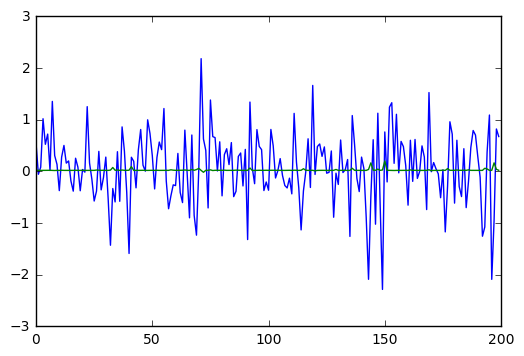

In [50]:
plt.plot(test_true)
plt.plot(test_pred)
plt.show()

In [51]:
print(test_true)

[  5.40374756e-01  -5.44908233e-02   8.24047178e-02   1.02017319e+00
   5.25154650e-01   7.22967029e-01   1.81592554e-02   1.35542500e+00
   3.08648318e-01   1.37487963e-01  -3.70876074e-01   2.77404696e-01
   5.03296494e-01   1.61005050e-01   2.03302607e-01  -1.85193658e-01
  -3.81122202e-01   2.55647242e-01   8.28294009e-02  -3.73603761e-01
   3.73817012e-02  -1.36409523e-02   1.25405705e+00   1.64045826e-01
  -1.47983462e-01  -5.72303355e-01  -3.80586505e-01   3.88544977e-01
  -3.56996030e-01  -1.15292057e-01   2.77605593e-01  -5.17661810e-01
  -1.42816019e+00  -3.30459535e-01  -5.90030193e-01   3.82119536e-01
  -5.77960312e-01   8.61937642e-01   3.94701093e-01  -4.03965801e-01
  -1.58741951e+00   2.74764538e-01   1.96340159e-01  -3.17431808e-01
   4.16422158e-01   8.11695278e-01   1.20986283e-01   5.44312084e-03
   9.99288082e-01   7.34578907e-01   3.05228353e-01  -3.38041544e-01
   2.71467954e-01   5.69315314e-01   4.21773911e-01   1.21776736e+00
  -1.84295401e-01  -7.21688628e-01

In [52]:
print(test_pred)

[[ 0.02387737]
 [ 0.02158943]
 [ 0.0202869 ]
 [ 0.02013792]
 [ 0.02181011]
 [ 0.02153017]
 [ 0.02214447]
 [ 0.02015083]
 [ 0.01814087]
 [ 0.02066258]
 [ 0.02019478]
 [ 0.02293262]
 [ 0.02055255]
 [ 0.02144327]
 [ 0.0202356 ]
 [ 0.02033063]
 [ 0.02092625]
 [ 0.02308735]
 [ 0.0204811 ]
 [ 0.02013813]
 [ 0.02297333]
 [ 0.02013719]
 [ 0.02019329]
 [ 0.01971892]
 [ 0.02024154]
 [ 0.02068689]
 [ 0.02696664]
 [ 0.02307913]
 [ 0.02097279]
 [ 0.02273091]
 [ 0.02051565]
 [ 0.02055322]
 [ 0.02565487]
 [ 0.07657361]
 [ 0.02237011]
 [ 0.02742975]
 [ 0.0209468 ]
 [ 0.02711239]
 [ 0.02224036]
 [ 0.02099782]
 [ 0.02345054]
 [ 0.09341225]
 [ 0.02054362]
 [ 0.02031322]
 [ 0.02220462]
 [ 0.02108683]
 [ 0.02224889]
 [ 0.02017182]
 [ 0.02016477]
 [ 0.02190648]
 [ 0.02216583]
 [ 0.02065016]
 [ 0.02246992]
 [ 0.02053259]
 [ 0.0216983 ]
 [ 0.02110887]
 [ 0.02017754]
 [ 0.0209199 ]
 [ 0.03148437]
 [ 0.0246866 ]
 [ 0.0215598 ]
 [ 0.02170576]
 [ 0.02081338]
 [ 0.02350703]
 [ 0.02777847]
 [ 0.02224331]
 [ 0.02032

In [54]:
test_true=testY[:30]
test_pred=testPredict[:30]

In [55]:
test_true_clssfi=[]
for  i in range(1,len(test_true)):
    if test_true[i]>test_true[i-1]:
        test_true_clssfi.append(1)
    else:
        test_true_clssfi.append(0)

In [56]:
test_pred_clssfi=[]
for  i in range(1,len(test_pred)):
    if test_pred[i]>test_pred[i-1]:
        test_pred_clssfi.append(1)
    else:
        test_pred_clssfi.append(0)

In [57]:
from sklearn.metrics import accuracy_score
result = accuracy_score(test_true_clssfi,test_pred_clssfi)
print(result)

0.48275862069
